<a href="https://colab.research.google.com/github/sumanyurosha/tensorflow-specialization/blob/master/Course3/Practice/Week_3_Lesson_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Single Layer LSTM

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.0


In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.0


In [4]:
# Get the data
dataset, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3KYXUS/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3KYXUS/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3KYXUS/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [5]:
train_dataset, test_dataset = dataset["train"], dataset["test"]

In [6]:
tokenizer = info.features["text"].encoder

In [7]:
BATCH_SIZE = 32
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [8]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Embedding(tokenizer.vocab_size, 64),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
782/782 [==============================] - 99s 116ms/step - loss: 0.6099 - accuracy: 0.6418 - val_loss: 0.4450 - val_accuracy: 0.8158
Epoch 2/10
782/782 [==============================] - 90s 115ms/step - loss: 0.5714 - accuracy: 0.6957 - val_loss: 0.5511 - val_accuracy: 0.7442
Epoch 3/10
782/782 [==============================] - 90s 115ms/step - loss: 0.4359 - accuracy: 0.8045 - val_loss: 0.5746 - val_accuracy: 0.7020
Epoch 4/10
782/782 [==============================] - 90s 114ms/step - loss: 0.3530 - accuracy: 0.8523 - val_loss: 0.4250 - val_accuracy: 0.8394
Epoch 5/10
782/782 [==============================] - 91s 116ms/step - loss: 0.2638 - accuracy: 0.9018 - val_loss: 0.3614 - val_accuracy: 0.8543
Epoch 6/10
782/782 [==============================] - 92s 117ms/step - loss: 0.1896 - accuracy: 0.9311 - val_loss: 0.3463 - val_accuracy: 0.8585
Epoch 7/10
782/782 [==============================] - 92s 116ms/step - loss: 0.1485 - accuracy: 0.9504 - val_loss: 0.4022 - val_ac

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

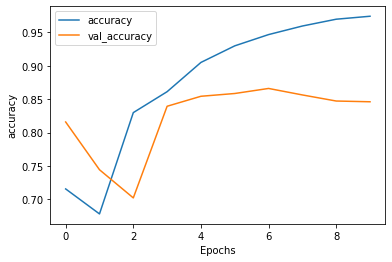

In [13]:
plot_graphs(history, 'accuracy')

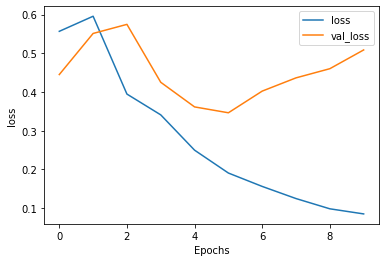

In [14]:
plot_graphs(history, 'loss')